In [1]:
# --- Setup and Path Definition ---
import sys
from pathlib import Path

# Find the project root by looking for the .git folder
PROJECT_ROOT = Path.cwd().resolve().parents[2]

# Define key paths
DATA_PATH = PROJECT_ROOT / "src" / "data"
SRC_PATH = PROJECT_ROOT / "src"

# Add the 'src' directory to sys.path to allow for module imports
if str(SRC_PATH) not in sys.path:
    sys.path.append(str(SRC_PATH))

print(f"Project Root: {PROJECT_ROOT}")
print(f"Data Path:    {DATA_PATH}")
# --- End of Setup ---

Project Root: /Users/Faheem/Desktop/IITH/Sem 5 Textbooks and Extras/Bayesian/Project 2
Data Path:    /Users/Faheem/Desktop/IITH/Sem 5 Textbooks and Extras/Bayesian/Project 2/src/data


### Exploratory Data Analysis
We begin by loading the Ames Housing dataset and performing initial exploratory data analysis (EDA) to understand the structure and characteristics of the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(DATA_PATH / 'processed' / 'preprocessed_ames_data.csv')

# Display basic information about the dataset
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gr_Liv_Area   2930 non-null   float64
 1   Overall_Qual  2930 non-null   object 
 2   Year_Built    2930 non-null   float64
 3   Neighborhood  2930 non-null   object 
 4   Sale_Price    2930 non-null   float64
dtypes: float64(3), object(2)
memory usage: 114.6+ KB
None
       Gr_Liv_Area   Year_Built     Sale_Price
count  2930.000000  2930.000000    2930.000000
mean   1499.690444  1971.356314  180796.060068
std     505.508887    30.245361   79886.692357
min     334.000000  1872.000000   12789.000000
25%    1126.000000  1954.000000  129500.000000
50%    1442.000000  1973.000000  160000.000000
75%    1742.750000  2001.000000  213500.000000
max    5642.000000  2010.000000  755000.000000
   Gr_Liv_Area   Overall_Qual  Year_Built Neighborhood  Sale_Price
0       1656.0  Above_Average      1960.0   

In [4]:
# Missing Values Analysis
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Gr_Liv_Area     0
Overall_Qual    0
Year_Built      0
Neighborhood    0
Sale_Price      0
dtype: int64


In [5]:
# Overall_Qual value counts
print("Overall_Qual Value Counts:")
print(df['Overall_Qual'].value_counts().sort_index())

Overall_Qual Value Counts:
Overall_Qual
Above_Average     732
Average           825
Below_Average     226
Excellent         107
Fair               40
Good              602
Poor               13
Very_Excellent     31
Very_Good         350
Very_Poor           4
Name: count, dtype: int64


In [6]:
# To convert Overall_Qual (an ordinal variable), we perform ordinal encoding

# Create a dictionary to map the quality ratings to a numerical scale
quality_map = {
    'Very_Poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Below_Average': 4,
    'Average': 5,
    'Above_Average': 6,
    'Good': 7,
    'Very_Good': 8,
    'Excellent': 9,
    'Very_Excellent': 10
}

df['Overall_Qual_Numeric'] = df['Overall_Qual'].map(quality_map)

# Display the first few rows with the original and new columns
print(df[['Overall_Qual', 'Overall_Qual_Numeric']].head())

# Check the data types of your new DataFrame
print("\nNew DataFrame Info:")
df.info()

    Overall_Qual  Overall_Qual_Numeric
0  Above_Average                     6
1        Average                     5
2  Above_Average                     6
3           Good                     7
4        Average                     5

New DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gr_Liv_Area           2930 non-null   float64
 1   Overall_Qual          2930 non-null   object 
 2   Year_Built            2930 non-null   float64
 3   Neighborhood          2930 non-null   object 
 4   Sale_Price            2930 non-null   float64
 5   Overall_Qual_Numeric  2930 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 137.5+ KB


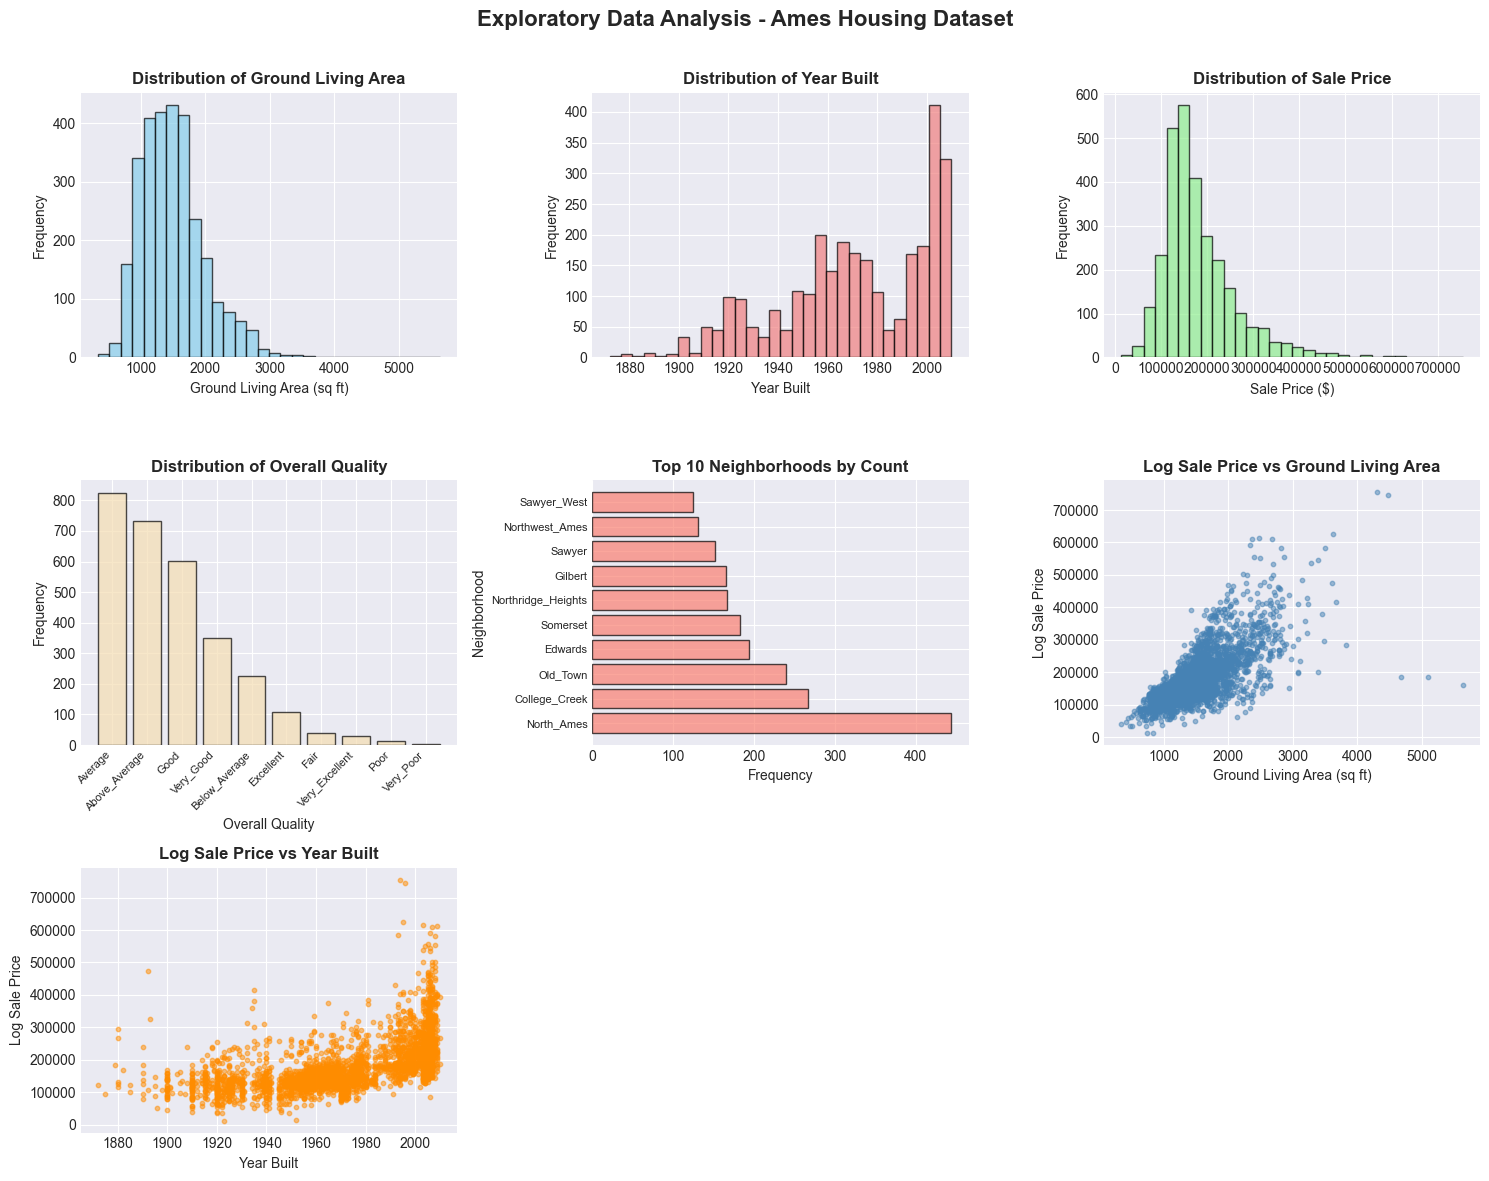

In [7]:
# Set up the plotting style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis - Ames Housing Dataset', fontsize=16, fontweight='bold')

# Plot histograms for numerical columns
axes[0, 0].hist(df['Gr_Liv_Area'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Ground Living Area (sq ft)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].set_title('Distribution of Ground Living Area', fontweight='bold')

axes[0, 1].hist(df['Year_Built'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Year Built', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].set_title('Distribution of Year Built', fontweight='bold')

axes[0, 2].hist(df['Sale_Price'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Sale Price ($)', fontsize=10)
axes[0, 2].set_ylabel('Frequency', fontsize=10)
axes[0, 2].set_title('Distribution of Sale Price', fontweight='bold')

# axes[1, 0].hist(df['Log_Sale_Price'], bins=30, color='plum', edgecolor='black', alpha=0.7)
# axes[1, 0].set_xlabel('Log Sale Price', fontsize=10)
# axes[1, 0].set_ylabel('Frequency', fontsize=10)
# axes[1, 0].set_title('Distribution of Log Sale Price', fontweight='bold')

# Plot categorical columns
overall_qual_counts = df['Overall_Qual'].value_counts()
axes[1, 0].bar(range(len(overall_qual_counts)), overall_qual_counts.values, color='wheat', edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(len(overall_qual_counts)))
axes[1, 0].set_xticklabels(overall_qual_counts.index, rotation=45, ha='right', fontsize=8)
axes[1, 0].set_xlabel('Overall Quality', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].set_title('Distribution of Overall Quality', fontweight='bold')

neighborhood_counts = df['Neighborhood'].value_counts().head(10)
axes[1, 1].barh(range(len(neighborhood_counts)), neighborhood_counts.values, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 1].set_yticks(range(len(neighborhood_counts)))
axes[1, 1].set_yticklabels(neighborhood_counts.index, fontsize=8)
axes[1, 1].set_xlabel('Frequency', fontsize=10)
axes[1, 1].set_ylabel('Neighborhood', fontsize=10)
axes[1, 1].set_title('Top 10 Neighborhoods by Count', fontweight='bold')

# Scatter plots: Log_Sale_Price vs predictors
axes[1, 2].scatter(df['Gr_Liv_Area'], df['Sale_Price'], alpha=0.5, s=10, color='steelblue')
axes[1, 2].set_xlabel('Ground Living Area (sq ft)', fontsize=10)
axes[1, 2].set_ylabel('Log Sale Price', fontsize=10)
axes[1, 2].set_title('Log Sale Price vs Ground Living Area', fontweight='bold')

axes[2, 0].scatter(df['Year_Built'], df['Sale_Price'], alpha=0.5, s=10, color='darkorange')
axes[2, 0].set_xlabel('Year Built', fontsize=10)
axes[2, 0].set_ylabel('Log Sale Price', fontsize=10)
axes[2, 0].set_title('Log Sale Price vs Year Built', fontweight='bold')

# Remove the empty subplot
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

We notice that the `Sale_Price` variable is right-skewed. To address this, we apply a logarithmic transformation to `Sale_Price` to create a new variable `Log_Sale_Price`, which helps in normalizing the distribution.

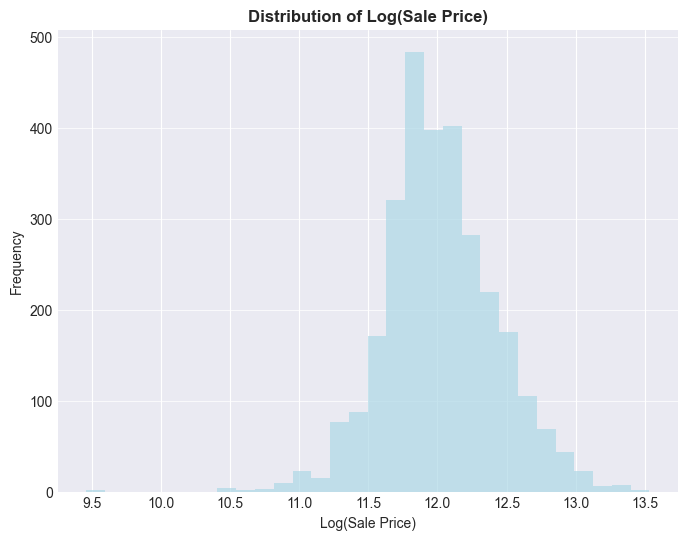

In [8]:
df['Log_Sale_Price'] = np.log1p(df['Sale_Price'])

# Plot histogram of Log_Sale_Price
plt.figure(figsize=(8, 6))
plt.hist(df['Log_Sale_Price'], bins=30, color='lightblue', alpha=0.7)
plt.title('Distribution of Log(Sale Price)', fontweight='bold')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

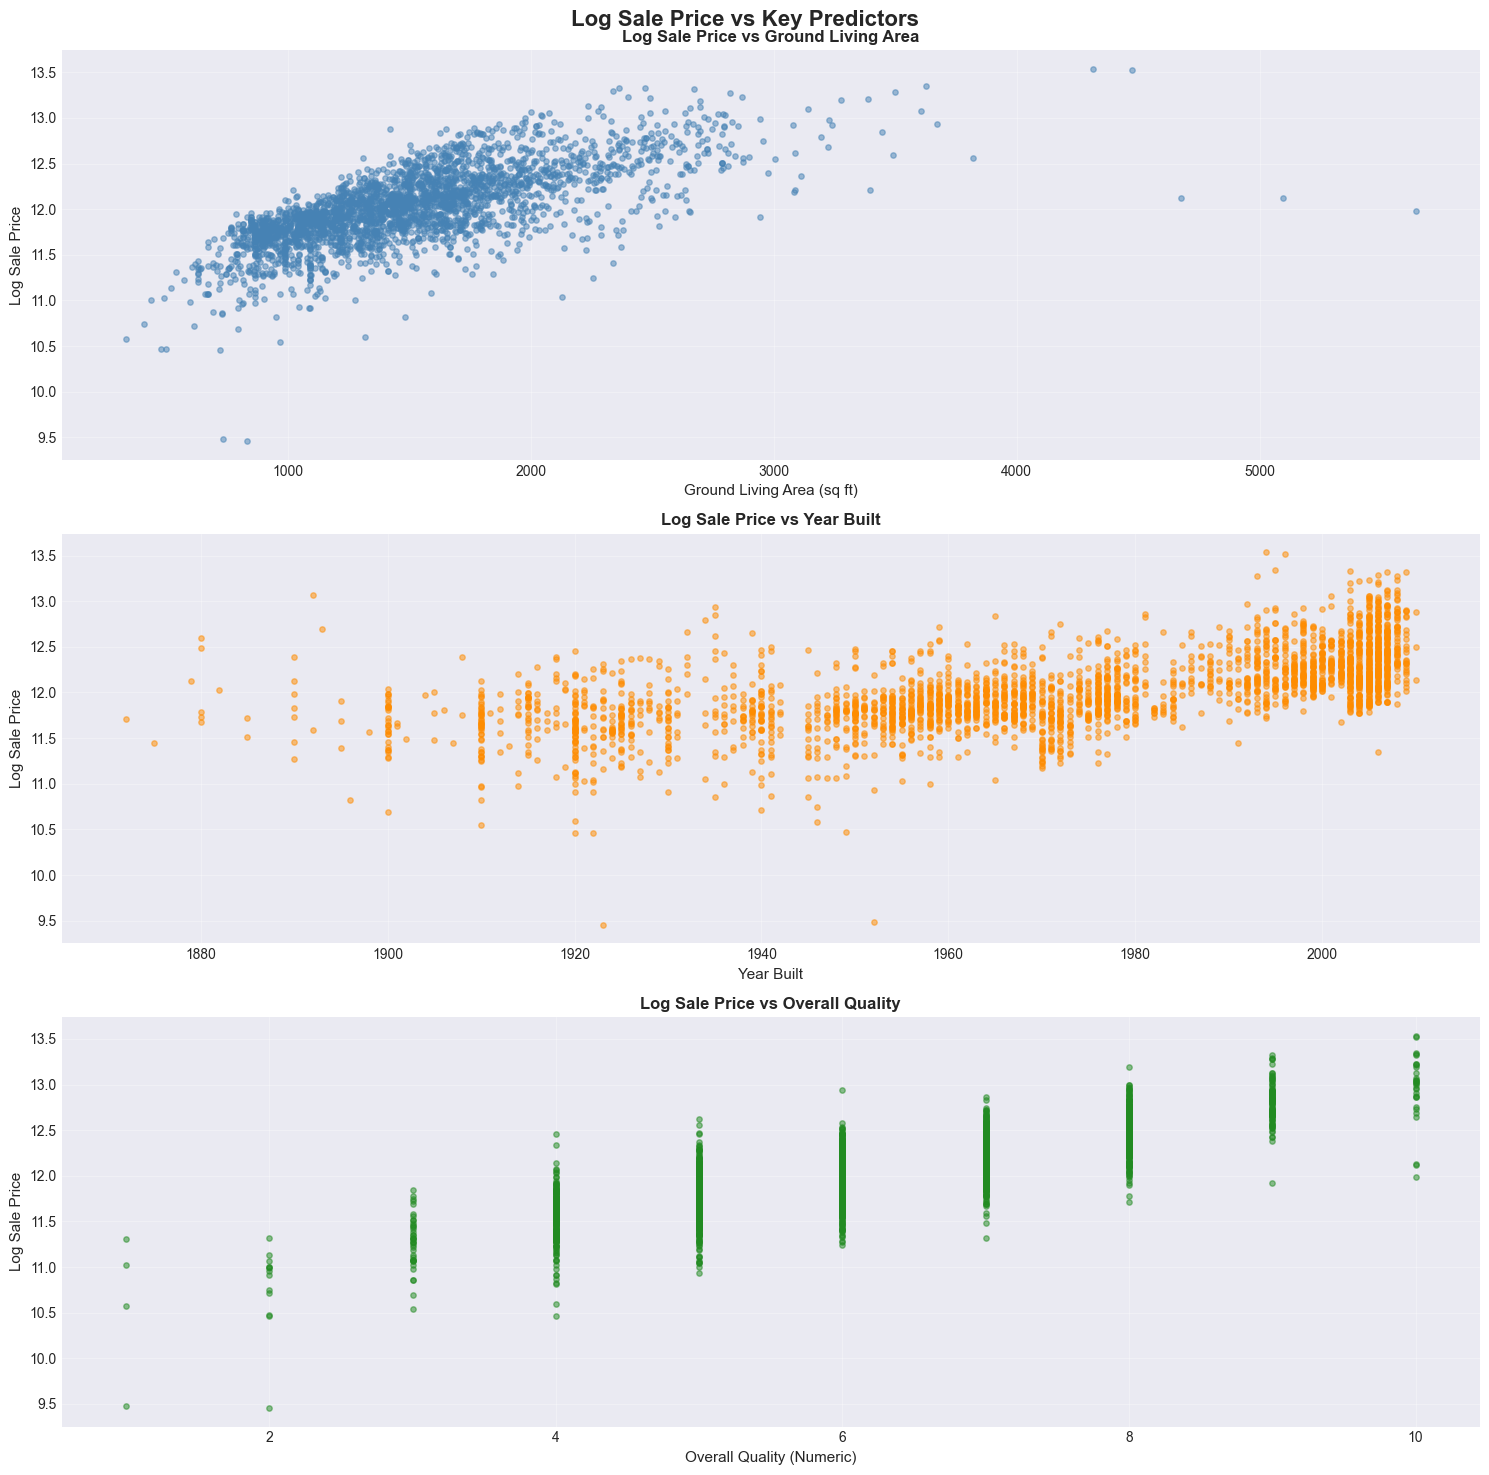

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Log Sale Price vs Key Predictors', fontsize=16, fontweight='bold')

# Scatter plot: Log_Sale_Price vs Gr_Liv_Area
axes[0].scatter(df['Gr_Liv_Area'], df['Log_Sale_Price'], alpha=0.5, s=15, color='steelblue')
axes[0].set_xlabel('Ground Living Area (sq ft)', fontsize=11)
axes[0].set_ylabel('Log Sale Price', fontsize=11)
axes[0].set_title('Log Sale Price vs Ground Living Area', fontweight='bold')
axes[0].grid(alpha=0.3)

# Scatter plot: Log_Sale_Price vs Year_Built
axes[1].scatter(df['Year_Built'], df['Log_Sale_Price'], alpha=0.5, s=15, color='darkorange')
axes[1].set_xlabel('Year Built', fontsize=11)
axes[1].set_ylabel('Log Sale Price', fontsize=11)
axes[1].set_title('Log Sale Price vs Year Built', fontweight='bold')
axes[1].grid(alpha=0.3)

# Scatter plot: Log_Sale_Price vs Overall_Qual_Numeric
axes[2].scatter(df['Overall_Qual_Numeric'], df['Log_Sale_Price'], alpha=0.5, s=15, color='forestgreen')
axes[2].set_xlabel('Overall Quality (Numeric)', fontsize=11)
axes[2].set_ylabel('Log Sale Price', fontsize=11)
axes[2].set_title('Log Sale Price vs Overall Quality', fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


#### Observations from EDA

Direct Observations:

* The dataset contains 2930 rows with 6 columns in consideration for the Bayesian analysis.

- There are no missing values in any of the columns we're considering.

Observations from Plots:

- The `Sale_Price` column is right-skewed, indicating that most houses are priced lower, with a few high-priced outliers. (A log transformation of `Sale_Price` is computed which helps in normalizing the distribution.)

- Most of the houses were built after 1950 with a peak near the 2000s.

- `North_Ames` and `College_Creek` are the most common neighborhoods in the dataset.

- A visual correlation seems to be present between `Gr_Liv_Area` and `Overall_Qual_Numeric` to `Log_Sale_Price`, suggesting that larger living areas tend to have higher sale prices whereas `Year_Built` seems to have a weaker correlation with `Log_Sale_Price`.)

In [10]:
df.to_csv(DATA_PATH / 'processed' / 'post_eda_ames_data.csv', index=False)